# Base de dados de fator contribuinte

#### Base consiste nos fatores que contribuirão para a ocorrência

## Importando pacotes e bases de dados

In [54]:
#Importando pacotes
i## Importando pacotes e bases de dadosmport numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import random

In [55]:
#verificando o tipo de encoding
import chardet
with open("fator_contribuinte.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [88]:
#Importando a base de dados
df_fator_contribuinte = pd.read_csv("fator_contribuinte.csv",encoding='ISO-8859-1', sep = ';')

## Visualização inicial da base e seus atributos

In [57]:
df_fator_contribuinte

,codigo_ocorrencia3,fator_nome,fator_aspecto,fator_condicionante,fator_area
0,39115,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
1,39115,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
2,39115,PERCEPÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
3,39115,PLANEJAMENTO DE VOO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
4,39115,POUCA EXPERIÊNCIA DO PILOTO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
...,...,...,...,...,...
3712,78612,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
3713,78620,OUTRO FATOR,***,***,***
3714,78655,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
3715,78655,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL


## Exploração dos Atributos

In [59]:
#possibilidades para o atributo fator_nome
print(df_fator_contribuinte['fator_nome'].astype('category').cat.categories)
#total de fatores
print(len(df_fator_contribuinte['fator_nome'].astype('category').cat.categories))

Index(['ANSIEDADE', 'APLICAÇÃO DE COMANDOS', 'ATENÇÃO', 'ATITUDE',
       'CARACTERÍSTICAS DA TAREFA', 'CLIMA ORGANIZACIONAL', 'COLISÃO COM AVE',
       'COLISÃO COM FAUNA (NÃO-AVE)', 'COMUNICAÇÃO',
       'CONDIÇÕES FÍSICAS DO TRABALHO', 'CONDIÇÕES METEOROLÓGICAS ADVERSAS',
       'CONHECIMENTO DE NORMAS (ATS)', 'COORDENAÇÃO DE CABINE',
       'COORDENAÇÃO DE TRÁFEGO', 'CULTURA DO GRUPO DE TRABALHO',
       'CULTURA ORGANIZACIONAL', 'DESORIENTAÇÃO', 'DESVIO DE NAVEGAÇÃO',
       'DIETA INADEQUADA', 'DINÂMICA DE EQUIPE', 'ENFERMIDADE',
       'EQUIPAMENTO - CARACTERÍSTICAS ERGONÔMICAS',
       'EQUIPAMENTO DE APOIO (ATS)', 'ESQUECIMENTO DO PILOTO',
       'ESTADO EMOCIONAL', 'ESTRESSE', 'FABRICAÇÃO', 'FADIGA',
       'FORMAÇÃO, CAPACITAÇÃO E TREINAMENTO', 'FRASEOLOGIA DA TRIPULAÇÃO',
       'FRASEOLOGIA DO ÓRGÃO ATS', 'ILUSÕES VISUAIS', 'INCONSCIÊNCIA',
       'INDISCIPLINA DE VOO', 'INFLUÊNCIA DO MEIO AMBIENTE',
       'INFLUÊNCIAS EXTERNAS', 'INFRAESTRUTURA AEROPORTUÁRIA', 'INSTRUÇÃO

### Identifiação dos principais fatores de ocorrências

In [95]:
#agrupamento do nome dos fatores considerando a contagem
fatores_principais = df_fator_contribuinte.groupby(['fator_nome']).count().sort_values('codigo_ocorrencia3',ascending=False)[:10].reset_index()

In [96]:
#visualização dos 10 fatores mais recorrentes
fatores_principais

,fator_nome,codigo_ocorrencia3,fator_aspecto,fator_condicionante,fator_area
0,JULGAMENTO DE PILOTAGEM,483,483,483,483
1,APLICAÇÃO DE COMANDOS,333,333,333,333
2,SUPERVISÃO GERENCIAL,304,304,304,304
3,PLANEJAMENTO DE VOO,278,278,278,278
4,MANUTENÇÃO DE AERONAVE,225,225,225,225
5,PROCESSO DECISÓRIO,175,175,175,175
6,POUCA EXPERIÊNCIA DO PILOTO,155,155,155,155
7,ATITUDE,147,147,147,147
8,INDISCIPLINA DE VOO,141,141,141,141
9,INSTRUÇÃO,110,110,110,110


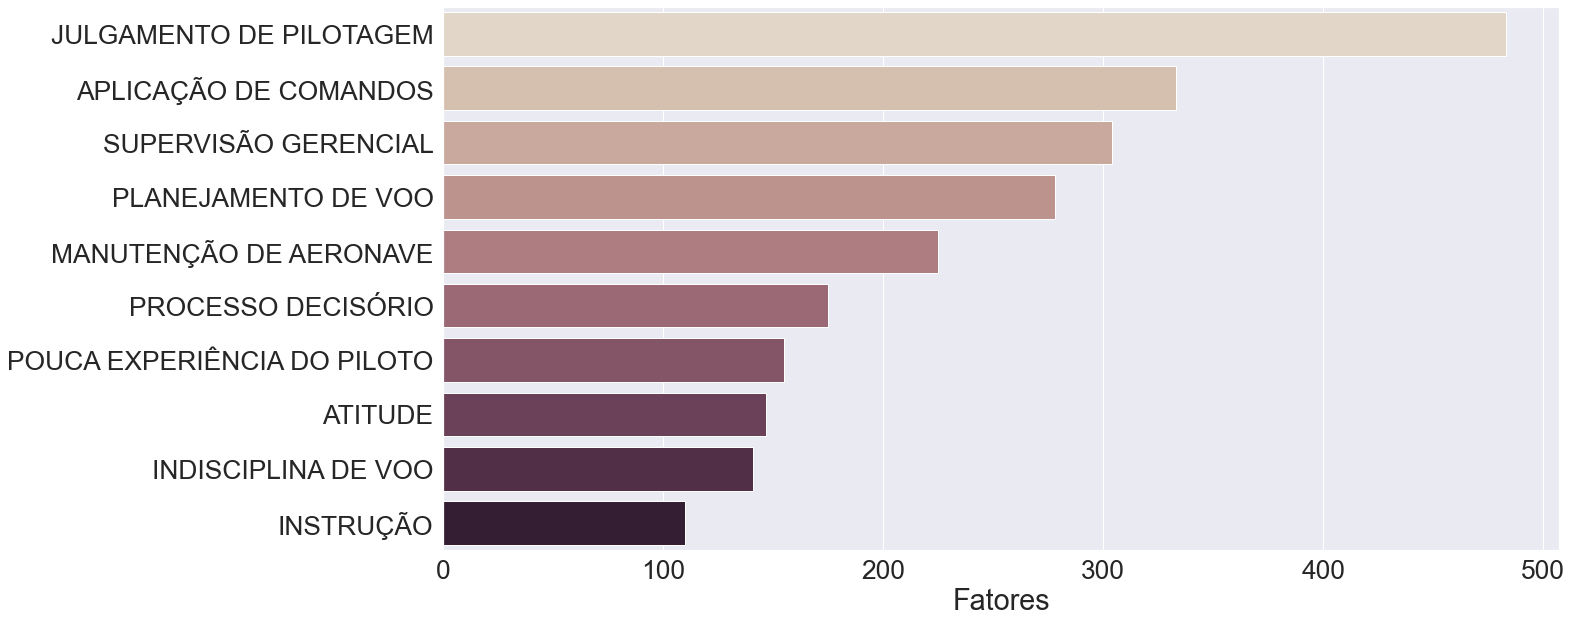

In [97]:
#Distribuição dos fatores mais recorrentes
sns.set(font_scale = 2.4)
sns_plot = sns.barplot(x="codigo_ocorrencia3", y="fator_nome", data=fatores_principais, palette="ch:.25")
sns_plot.figure.set_size_inches(20, 10)
sns_plot.set_ylabel("")
sns_plot.set_xlabel("Fatores")
sns_plot.figure.savefig("principais_fatores.png", bbox_inches = 'tight')

In [98]:
#identificando principais fatores humanos
df_fator_humano=df_fator_contribuinte[df_fator_contribuinte['fator_area']=='FATOR HUMANO']
fatores_principais = df_fator_humano.groupby(['fator_nome']).count().sort_values('codigo_ocorrencia3',ascending=False)[:10].reset_index()
fatores_principais

,fator_nome,codigo_ocorrencia3,fator_aspecto,fator_condicionante,fator_area
0,PROCESSO DECISÓRIO,175,175,175,175
1,ATITUDE,147,147,147,147
2,PERCEPÇÃO,105,105,105,105
3,PROCESSOS ORGANIZACIONAIS,84,84,84,84
4,ATENÇÃO,67,67,67,67
5,"FORMAÇÃO, CAPACITAÇÃO E TREINAMENTO",66,66,66,66
6,CULTURA ORGANIZACIONAL,61,61,61,61
7,MOTIVAÇÃO,57,57,57,57
8,SISTEMAS DE APOIO,46,46,46,46
9,ORGANIZAÇÃO DO TRABALHO,39,39,39,39


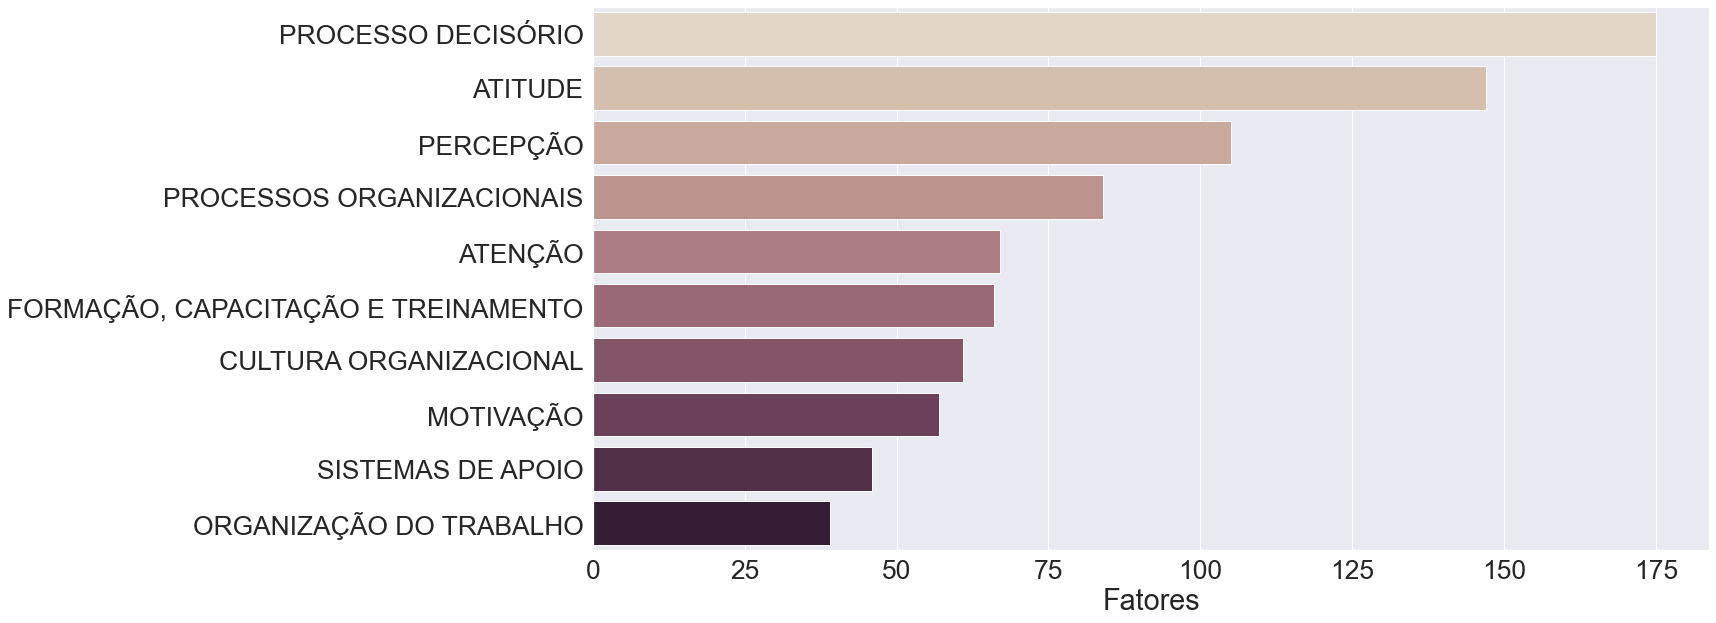

In [99]:
#Distribuição dos principais fatores humanos
sns.set(font_scale = 2.4)
sns_plot = sns.barplot(x="codigo_ocorrencia3", y="fator_nome", data=fatores_principais,palette="ch:.25")
sns_plot.figure.set_size_inches(20, 10)
sns_plot.set_ylabel("")
sns_plot.set_xlabel("Fatores")
sns_plot.figure.savefig("principais_fatores_humanos.png", bbox_inches = 'tight')

### Identificando possibilidades para os demais atributos

In [110]:
#possibilidades para o atributo fator_aspecto
df_fator_contribuinte['fator_aspecto'].astype('category').cat.categories

Index(['***', 'ASPECTO DA FABRICAÇÃO', 'ASPECTO DO MANUSEIO MATERIAL',
       'ASPECTO DO PROJETO', 'ASPECTO MÉDICO', 'ASPECTO PSICOLÓGICO',
       'DESEMPENHO DO SER HUMANO', 'ERGONOMIA', 'INFRAESTRUTURA AEROPORTUÁRIA',
       'INFRAESTRUTURA DE TRÁFEGO AÉREO'],
      dtype='object')

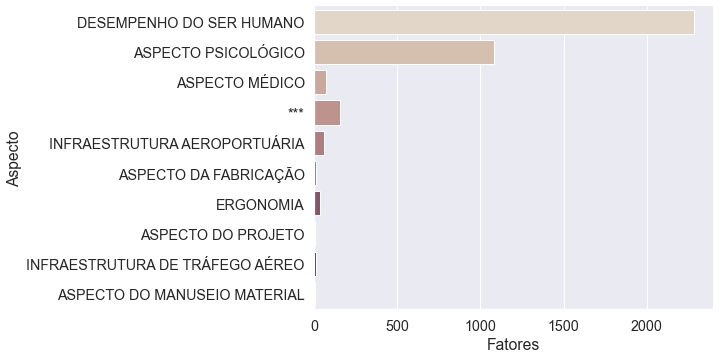

In [100]:
#Distribuição dos aspectos dos fatores
sns.set(font_scale = 1.3)
sns_plot = sns.catplot(y='fator_aspecto', kind="count", palette="ch:.25", data=df_fator_contribuinte, aspect=2)
sns_plot.set_axis_labels("Fatores","Aspecto")
sns_plot.savefig("fator_aspecto.png",bbox_inches = 'tight')

In [111]:
#possibilidades para o atributo fator_condicionante
df_fator_contribuinte['fator_condicionante'].astype('category').cat.categories

Index(['***', 'INDIVIDUAL', 'MANUTENÇÃO DA AERONAVE', 'OPERAÇÃO DA AERONAVE',
       'ORGANIZACIONAL', 'PRESTAÇÃO DE SERVIÇOS DE TRÁFEGO AÉREO',
       'PSICOSSOCIAL'],
      dtype='object')

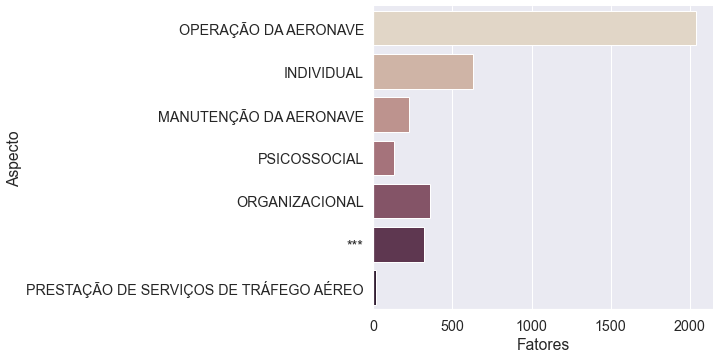

In [102]:
sns.set(font_scale = 1.3)
sns_plot = sns.catplot(y='fator_condicionante', kind="count", palette="ch:.25", data=df_fator_contribuinte, aspect=2)
sns_plot.set_axis_labels("Fatores","Aspecto")
sns_plot.savefig("fator_condicionante.png",bbox_inches = 'tight')

In [112]:
#possibilidades para o atributo fator_area
df_fator_contribuinte['fator_area'].astype('category').cat.categories

Index(['***', 'FATOR HUMANO', 'FATOR MATERIAL', 'FATOR OPERACIONAL'], dtype='object')

### Estudo do símbolo '***' e valores faltantes

In [60]:
#entendendo melhor o símbolo '***'
df_fator_contribuinte[df_fator_contribuinte['fator_area']=='FATOR MATERIAL'].head()

,codigo_ocorrencia3,fator_nome,fator_aspecto,fator_condicionante,fator_area
84,39687,FABRICAÇÃO,ASPECTO DA FABRICAÇÃO,***,FATOR MATERIAL
108,39969,FABRICAÇÃO,ASPECTO DA FABRICAÇÃO,***,FATOR MATERIAL
359,41900,PROJETO,ASPECTO DO PROJETO,***,FATOR MATERIAL
647,43702,FABRICAÇÃO,ASPECTO DA FABRICAÇÃO,***,FATOR MATERIAL
965,44796,FABRICAÇÃO,ASPECTO DA FABRICAÇÃO,***,FATOR MATERIAL


In [61]:
#entendendo melhor o símbolo '***''
df_fator_contribuinte[df_fator_contribuinte['fator_aspecto']=='ASPECTO MÉDICO'].head()

,codigo_ocorrencia3,fator_nome,fator_aspecto,fator_condicionante,fator_area
15,39275,FADIGA,ASPECTO MÉDICO,***,FATOR HUMANO
19,39275,MEDICAMENTO,ASPECTO MÉDICO,***,FATOR HUMANO
48,39319,ANSIEDADE,ASPECTO MÉDICO,***,FATOR HUMANO
100,39930,DIETA INADEQUADA,ASPECTO MÉDICO,***,FATOR HUMANO
101,39930,FADIGA,ASPECTO MÉDICO,***,FATOR HUMANO


In [115]:
#o símbolo '***' não referente a valores faltantes e sim para fatores em que certo atributo não é considerado

In [116]:
#checando demais valores faltantes
if len(df_fator_contribuinte) == len(df_fator_contribuinte.dropna()):
    print('Não existem missing values')
else:
    print('Existem missing values')

Não existem missing values


### Criação de área para fatores que tem área = '***'

In [117]:
#instâncias com fator de área = '***'
db_fator_contribuinte[df_fator_contribuinte['fator_area'] == '***']['fator_nome'].astype('category').cat.categories

Index(['CONDIÇÕES METEOROLÓGICAS ADVERSAS', 'OUTRO FATOR'], dtype='object')

In [111]:
#criando lista para novo fatores de área
#atribuindo área 'OUTRO FATOR para nome de fator 'OUTRO FATOR'
#atribuindo área 'FATOR METEOROLÓGICO' para nome de fator 'CONDIÇÕES METEOROLÓGICAS ADVERSAS'
lista = []
for data in df_fator_contribuinte.iloc():
    if data['fator_nome'] == 'CONDIÇÕES METEOROLÓGICAS ADVERSAS':
        lista.append('FATOR METEOROLÓGICO')
    elif data['fator_nome'] == 'OUTRO FATOR':
        lista.append('OUTRO FATOR')
    else:
        lista.append(data['fator_area'])

In [112]:
#inserindo nova lista na base de dados
df_fator_contribuinte.iloc[:,-1]=lista

In [113]:
#Novas áreas para os fatores
df_fator_contribuinte['fator_area'].astype('category').cat.categories

Index(['FATOR HUMANO', 'FATOR MATERIAL', 'FATOR METEOROLÓGICO',
       'FATOR OPERACIONAL', 'OUTRO FATOR'],
      dtype='object')

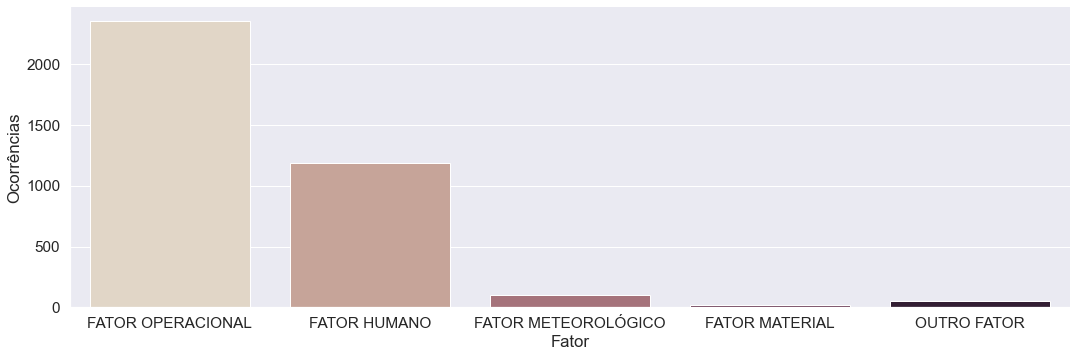

In [114]:
#Distribuição dos fatores
sns.set(font_scale = 1.4)
sns_plot = sns.catplot(x="fator_area", kind="count", palette="ch:.25", data=df_fator_contribuinte, aspect=3)
sns_plot.set_axis_labels("Fator","Ocorrências")
sns_plot.savefig("fator_area.png")

## Mineração de regras de associação para os fatores

### Preparação para unir diferentes fatores associados a uma mesma ocorrência em uma linha 

In [64]:
#calcula o número de fatores diferentes de uma mesma ocorrência
#cria lista de fatores para cada ocorrência

unique = df_fator_contribuinte.drop_duplicates('codigo_ocorrencia3')
dic = {}
for i,id in enumerate(unique['codigo_ocorrencia3']):
    dic[id]=i
fator_nome = ['']*len(unique)
total_fatores = [0]*len(unique)
for data in df_fator_contribuinte.iloc():
    total_fatores[dic[data[0]]] += 1
    if fator_nome[dic[data[0]]] == '':
        fator_nome[dic[data[0]]]+=str(data[1])
    else:
        fator_nome[dic[data[0]]]+=','+str(data[1])
        
#inserindo número total de fatores e lista de fatores na base de dados
unique['fator_nome'] = fator_nome
unique['total_fatores'] = total_fatores

<ipython-input-64-db3e24c5a642>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique['fator_nome'] = fator_nome
<ipython-input-64-db3e24c5a642>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique['total_fatores'] = total_fatores


In [66]:
#Visualização da base de dados agrupada por ocorrência
unique

,codigo_ocorrencia3,fator_nome,fator_aspecto,fator_condicionante,fator_area,total_fatores
0,39115,"APLICAÇÃO DE COMANDOS,JULGAMENTO DE PILOTAGEM,...",DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,6
6,39156,"MANUTENÇÃO DE AERONAVE,PLANEJAMENTO GERENCIAL,...",DESEMPENHO DO SER HUMANO,MANUTENÇÃO DA AERONAVE,FATOR OPERACIONAL,3
9,39235,"PLANEJAMENTO DE VOO,POUCA EXPERIÊNCIA DO PILOTO",DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,2
11,39275,"APLICAÇÃO DE COMANDOS,CULTURA DO GRUPO DE TRAB...",DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,13
24,39315,"ATITUDE,CONDIÇÕES METEOROLÓGICAS ADVERSAS,CULT...",ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO,9
...,...,...,...,...,...,...
3707,78550,"APLICAÇÃO DE COMANDOS,JULGAMENTO DE PILOTAGEM",DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,2
3709,78609,"JULGAMENTO DE PILOTAGEM,PLANEJAMENTO DE VOO",DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,2
3711,78612,"APLICAÇÃO DE COMANDOS,JULGAMENTO DE PILOTAGEM",DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,2
3713,78620,OUTRO FATOR,***,***,***,1


### Distribuição da quantidade total de recomendações

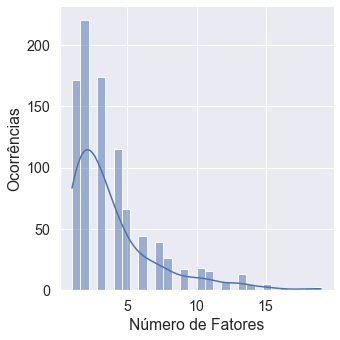

In [314]:
sns.set(font_scale = 1.3)
sns_plot = sns.displot(data=unique, x="total_fatores", kde=True)
sns_plot.set_axis_labels("Número de Fatores", "Ocorrências")
sns_plot.savefig("total_fatores.png")

In [136]:
#Descrição do total de fatores
unique['total_fatores'].describe()

count    944.000000
mean       3.937500
std        3.188213
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       19.000000
Name: total_fatores, dtype: float64

### Preparação para aplicar o apriori

In [105]:
!pip install mlxtend 
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [106]:
#adquirindo lista de fatores
registros_fator_nomes = []
for data in unique['fator_nome'].iloc:
    registros_fator_nomes.append(data.split(','))

### Aplicação do algoritmo

In [107]:
#derivando conjunto de itens frequentes
dataset = registros_fator_nomes
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
#suporte de 1%
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

frequent_itemsets

,support,itemsets
0,0.069915,( CAPACITAÇÃO E TREINAMENTO)
1,0.352754,(APLICAÇÃO DE COMANDOS)
2,0.070975,(ATENÇÃO)
3,0.155720,(ATITUDE)
4,0.015890,(CARACTERÍSTICAS DA TAREFA)
...,...,...
1636,0.011653,"(ATITUDE, FORMAÇÃO, CAPACITAÇÃO E TREINAMENTO..."
1637,0.010593,"(ATITUDE, FORMAÇÃO, PERCEPÇÃO, CAPACITAÇÃO E ..."
1638,0.012712,"(ATITUDE, FORMAÇÃO, CAPACITAÇÃO E TREINAMENTO..."
1639,0.010593,"(ATITUDE, FORMAÇÃO, PERCEPÇÃO, CAPACITAÇÃO E ..."


In [108]:
#derivando as regras, confiança de 20%
regras = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

In [176]:
#visualização das regras, 9948 regras foram derivadas
regras

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,( CAPACITAÇÃO E TREINAMENTO),(APLICAÇÃO DE COMANDOS),0.069915,0.352754,0.033898,0.484848,1.374465,0.009235,1.256418
1,(ATITUDE),( CAPACITAÇÃO E TREINAMENTO),0.155720,0.069915,0.043432,0.278912,3.989281,0.032545,1.289835
2,( CAPACITAÇÃO E TREINAMENTO),(ATITUDE),0.069915,0.155720,0.043432,0.621212,3.989281,0.032545,2.228898
3,(COMUNICAÇÃO),( CAPACITAÇÃO E TREINAMENTO),0.033898,0.069915,0.010593,0.312500,4.469697,0.008223,1.352851
4,( CAPACITAÇÃO E TREINAMENTO),(COORDENAÇÃO DE CABINE),0.069915,0.087924,0.022246,0.318182,3.618839,0.016099,1.337712
...,...,...,...,...,...,...,...,...,...
9943,"(ATITUDE, PROCESSOS ORGANIZACIONAIS)","(SUPERVISÃO GERENCIAL, PROCESSO DECISÓRIO, FOR...",0.041314,0.023305,0.011653,0.282051,12.102564,0.010690,1.360396
9944,"(PROCESSO DECISÓRIO, PROCESSOS ORGANIZACIONAIS)","(ATITUDE, SUPERVISÃO GERENCIAL, FORMAÇÃO, CAP...",0.041314,0.026483,0.011653,0.282051,10.650256,0.010558,1.355970
9945,"(SUPERVISÃO GERENCIAL, CAPACITAÇÃO E TREINAME...","(ATITUDE, PROCESSO DECISÓRIO, FORMAÇÃO, PROCES...",0.040254,0.015890,0.011653,0.289474,18.217544,0.011013,1.385044
9946,"(ATITUDE, CAPACITAÇÃO E TREINAMENTO)","(SUPERVISÃO GERENCIAL, PROCESSO DECISÓRIO, FOR...",0.043432,0.012712,0.011653,0.268293,21.105691,0.011100,1.349294


### Regras em que um fator diminui a ocorrência de outro

In [156]:
regras[regras['lift']<0.5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
214,(ESQUECIMENTO DO PILOTO),(JULGAMENTO DE PILOTAGEM),0.076271,0.511653,0.016949,0.222222,0.434323,-0.022075,0.627875
274,(MANUTENÇÃO DE AERONAVE),(JULGAMENTO DE PILOTAGEM),0.238347,0.511653,0.058263,0.244444,0.477755,-0.063688,0.646342
2372,"(SUPERVISÃO GERENCIAL, MANUTENÇÃO DE AERONAVE)",(JULGAMENTO DE PILOTAGEM),0.116525,0.511653,0.027542,0.236364,0.461961,-0.032078,0.639503


### Regras com lift mais alto

In [110]:
regras[regras['lift']>30]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3313,"( CAPACITAÇÃO E TREINAMENTO, DINÂMICA DE EQUIPE)","(FORMAÇÃO, COORDENAÇÃO DE CABINE)",0.012712,0.022246,0.010593,0.833333,37.460317,0.010310,5.866525
3314,"( CAPACITAÇÃO E TREINAMENTO, COORDENAÇÃO DE CA...","(DINÂMICA DE EQUIPE, FORMAÇÃO)",0.022246,0.012712,0.010593,0.476190,37.460317,0.010310,1.884823
3315,"(DINÂMICA DE EQUIPE, FORMAÇÃO)","( CAPACITAÇÃO E TREINAMENTO, COORDENAÇÃO DE CA...",0.012712,0.022246,0.010593,0.833333,37.460317,0.010310,5.866525
3317,"(FORMAÇÃO, COORDENAÇÃO DE CABINE)","( CAPACITAÇÃO E TREINAMENTO, DINÂMICA DE EQUIPE)",0.022246,0.012712,0.010593,0.476190,37.460317,0.010310,1.884823
8156,"(FORMAÇÃO, COORDENAÇÃO DE CABINE, PERCEPÇÃO)","( CAPACITAÇÃO E TREINAMENTO, PROCESSOS ORGANIZ...",0.010593,0.027542,0.010593,1.000000,36.307692,0.010301,inf
8158,"(FORMAÇÃO, COORDENAÇÃO DE CABINE, PROCESSOS OR...","( CAPACITAÇÃO E TREINAMENTO, PERCEPÇÃO)",0.012712,0.026483,0.010593,0.833333,31.466667,0.010257,5.841102
8162,"( CAPACITAÇÃO E TREINAMENTO, COORDENAÇÃO DE CA...","(FORMAÇÃO, PROCESSOS ORGANIZACIONAIS)",0.010593,0.027542,0.010593,1.000000,36.307692,0.010301,inf
8164,"( CAPACITAÇÃO E TREINAMENTO, COORDENAÇÃO DE CA...","(FORMAÇÃO, PERCEPÇÃO)",0.012712,0.026483,0.010593,0.833333,31.466667,0.010257,5.841102
8167,"(FORMAÇÃO, PERCEPÇÃO)","( CAPACITAÇÃO E TREINAMENTO, COORDENAÇÃO DE CA...",0.026483,0.012712,0.010593,0.400000,31.466667,0.010257,1.645480
8168,"(FORMAÇÃO, PROCESSOS ORGANIZACIONAIS)","( CAPACITAÇÃO E TREINAMENTO, COORDENAÇÃO DE CA...",0.027542,0.010593,0.010593,0.384615,36.307692,0.010301,1.607786


### Regras contendo condições meteorológicas

In [164]:
antecedents = regras[regras['antecedents'].apply(lambda x: 'CONDIÇÕES METEOROLÓGICAS ADVERSAS' in (x) and len(x) == 1)]

In [167]:
antecedents[antecedents['lift']>2]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
81,(CONDIÇÕES METEOROLÓGICAS ADVERSAS),(ATITUDE),0.10911,0.155720,0.040254,0.368932,2.369196,0.023264,1.337859
138,(CONDIÇÕES METEOROLÓGICAS ADVERSAS),(PERCEPÇÃO),0.10911,0.111229,0.025424,0.233010,2.094868,0.013288,1.158778
142,(CONDIÇÕES METEOROLÓGICAS ADVERSAS),(PROCESSO DECISÓRIO),0.10911,0.185381,0.045551,0.417476,2.251983,0.025324,1.398429
1163,(CONDIÇÕES METEOROLÓGICAS ADVERSAS),"(ATITUDE, JULGAMENTO DE PILOTAGEM)",0.10911,0.102754,0.028602,0.262136,2.551096,0.017390,1.216004
1174,(CONDIÇÕES METEOROLÓGICAS ADVERSAS),"(ATITUDE, PLANEJAMENTO DE VOO)",0.10911,0.072034,0.023305,0.213592,2.965163,0.015445,1.180006
1181,(CONDIÇÕES METEOROLÓGICAS ADVERSAS),"(ATITUDE, PROCESSO DECISÓRIO)",0.10911,0.094280,0.030720,0.281553,2.986364,0.020433,1.260665
1677,(CONDIÇÕES METEOROLÓGICAS ADVERSAS),"(INDISCIPLINA DE VOO, JULGAMENTO DE PILOTAGEM)",0.10911,0.098517,0.024364,0.223301,2.266625,0.013615,1.160659
1702,(CONDIÇÕES METEOROLÓGICAS ADVERSAS),"(PROCESSO DECISÓRIO, JULGAMENTO DE PILOTAGEM)",0.10911,0.149364,0.033898,0.310680,2.080011,0.017601,1.234021
1728,(CONDIÇÕES METEOROLÓGICAS ADVERSAS),"(PROCESSO DECISÓRIO, PLANEJAMENTO DE VOO)",0.10911,0.082627,0.028602,0.262136,3.172517,0.019586,1.243282
6199,(CONDIÇÕES METEOROLÓGICAS ADVERSAS),"(PROCESSO DECISÓRIO, JULGAMENTO DE PILOTAGEM, ...",0.10911,0.066737,0.023305,0.213592,3.200493,0.016023,1.186741


### Regras contendo capacitação e treinamento

In [128]:
antecedents = regras[regras['antecedents'].apply(lambda x: ' CAPACITAÇÃO E TREINAMENTO' in (x) and len(x) == 1)]

In [129]:
antecedents

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,( CAPACITAÇÃO E TREINAMENTO),(APLICAÇÃO DE COMANDOS),0.069915,0.352754,0.033898,0.484848,1.374465,0.009235,1.256418
1,( CAPACITAÇÃO E TREINAMENTO),(ATITUDE),0.069915,0.155720,0.043432,0.621212,3.989281,0.032545,2.228898
4,( CAPACITAÇÃO E TREINAMENTO),(COORDENAÇÃO DE CABINE),0.069915,0.087924,0.022246,0.318182,3.618839,0.016099,1.337712
7,( CAPACITAÇÃO E TREINAMENTO),(CULTURA ORGANIZACIONAL),0.069915,0.064619,0.026483,0.378788,5.861898,0.021965,1.505736
10,( CAPACITAÇÃO E TREINAMENTO),(FORMAÇÃO),0.069915,0.069915,0.069915,1.000000,14.303030,0.065027,inf
...,...,...,...,...,...,...,...,...,...
7769,( CAPACITAÇÃO E TREINAMENTO),"(FORMAÇÃO, JULGAMENTO DE PILOTAGEM, SUPERVISÃO...",0.069915,0.015890,0.015890,0.227273,14.303030,0.014779,1.273554
7867,( CAPACITAÇÃO E TREINAMENTO),"(FORMAÇÃO, ATITUDE, PROCESSO DECISÓRIO, PERCEP...",0.069915,0.014831,0.014831,0.212121,14.303030,0.013794,1.250407
7960,( CAPACITAÇÃO E TREINAMENTO),"(FORMAÇÃO, ATITUDE, PROCESSO DECISÓRIO, PROCES...",0.069915,0.015890,0.015890,0.227273,14.303030,0.014779,1.273554
7987,( CAPACITAÇÃO E TREINAMENTO),"(FORMAÇÃO, SUPERVISÃO GERENCIAL, ATITUDE, PROC...",0.069915,0.019068,0.019068,0.272727,14.303030,0.017735,1.348782


In [133]:
antecedents[antecedents['lift']>10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,( CAPACITAÇÃO E TREINAMENTO),(FORMAÇÃO),0.069915,0.069915,0.069915,1.000000,14.303030,0.065027,inf
373,( CAPACITAÇÃO E TREINAMENTO),"(APLICAÇÃO DE COMANDOS, FORMAÇÃO)",0.069915,0.033898,0.033898,0.484848,14.303030,0.031528,1.875374
414,( CAPACITAÇÃO E TREINAMENTO),"(FORMAÇÃO, ATITUDE)",0.069915,0.043432,0.043432,0.621212,14.303030,0.040396,2.525339
424,( CAPACITAÇÃO E TREINAMENTO),"(INSTRUÇÃO, ATITUDE)",0.069915,0.036017,0.025424,0.363636,10.096257,0.022906,1.514831
483,( CAPACITAÇÃO E TREINAMENTO),"(FORMAÇÃO, COORDENAÇÃO DE CABINE)",0.069915,0.022246,0.022246,0.318182,14.303030,0.020690,1.434040
...,...,...,...,...,...,...,...,...,...
7769,( CAPACITAÇÃO E TREINAMENTO),"(FORMAÇÃO, JULGAMENTO DE PILOTAGEM, SUPERVISÃO...",0.069915,0.015890,0.015890,0.227273,14.303030,0.014779,1.273554
7867,( CAPACITAÇÃO E TREINAMENTO),"(FORMAÇÃO, ATITUDE, PROCESSO DECISÓRIO, PERCEP...",0.069915,0.014831,0.014831,0.212121,14.303030,0.013794,1.250407
7960,( CAPACITAÇÃO E TREINAMENTO),"(FORMAÇÃO, ATITUDE, PROCESSO DECISÓRIO, PROCES...",0.069915,0.015890,0.015890,0.227273,14.303030,0.014779,1.273554
7987,( CAPACITAÇÃO E TREINAMENTO),"(FORMAÇÃO, SUPERVISÃO GERENCIAL, ATITUDE, PROC...",0.069915,0.019068,0.019068,0.272727,14.303030,0.017735,1.348782


### Regras contendo os principais fatores

In [135]:
consequents = regras[regras['consequents'].apply(lambda x: 'JULGAMENTO DE PILOTAGEM' in (x) and len(x) == 1)]

In [139]:
consequents[consequents['lift']>1.8]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4328,"(APLICAÇÃO DE COMANDOS, PROCESSO DECISÓRIO, CO...",(JULGAMENTO DE PILOTAGEM),0.013771,0.511653,0.012712,0.923077,1.804109,0.005666,6.348517
4483,"(APLICAÇÃO DE COMANDOS, PROCESSO DECISÓRIO, PL...",(JULGAMENTO DE PILOTAGEM),0.025424,0.511653,0.024364,0.958333,1.873016,0.011356,11.720339
6185,"(PLANEJAMENTO DE VOO, POUCA EXPERIÊNCIA DO PIL...",(JULGAMENTO DE PILOTAGEM),0.014831,0.511653,0.013771,0.928571,1.814848,0.006183,6.836864
6676,"(INDISCIPLINA DE VOO, POUCA EXPERIÊNCIA DO PIL...",(JULGAMENTO DE PILOTAGEM),0.015890,0.511653,0.014831,0.933333,1.824155,0.006700,7.325212
8695,"(PLANEJAMENTO DE VOO, PROCESSO DECISÓRIO, ATIT...",(JULGAMENTO DE PILOTAGEM),0.013771,0.511653,0.012712,0.923077,1.804109,0.005666,6.348517


In [141]:
consequents = regras[regras['consequents'].apply(lambda x: 'APLICAÇÃO DE COMANDOS' in (x) and len(x) == 1)]

In [146]:
consequents[consequents['lift']>2]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
856,"(POUCA EXPERIÊNCIA DO PILOTO, COORDENAÇÃO DE C...",(APLICAÇÃO DE COMANDOS),0.019068,0.352754,0.014831,0.777778,2.204872,0.008104,2.912606
4323,"(POUCA EXPERIÊNCIA DO PILOTO, JULGAMENTO DE PI...",(APLICAÇÃO DE COMANDOS),0.012712,0.352754,0.010593,0.833333,2.362362,0.006109,3.883475
4445,"(INSTRUÇÃO, POUCA EXPERIÊNCIA DO PILOTO, SUPER...",(APLICAÇÃO DE COMANDOS),0.034958,0.352754,0.026483,0.757576,2.147602,0.014152,2.669889


In [287]:
consequents = regras[regras['consequents'].apply(lambda x: 'SUPERVISÃO GERENCIAL' in (x) and len(x) == 1)]

In [296]:
consequents[consequents['lift']>2.85]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1844,"(CULTURA DO GRUPO DE TRABALHO, CULTURA ORGANIZ...",(SUPERVISÃO GERENCIAL),0.016949,0.322034,0.015890,0.937500,2.911184,0.010432,10.847458
2012,"(PLANEJAMENTO GERENCIAL, CULTURA ORGANIZACIONAL)",(SUPERVISÃO GERENCIAL),0.013771,0.322034,0.013771,1.000000,3.105263,0.009336,inf
2032,"(PROCESSOS ORGANIZACIONAIS, CULTURA ORGANIZACI...",(SUPERVISÃO GERENCIAL),0.024364,0.322034,0.023305,0.956522,2.970252,0.015459,15.593220
2717,"( CAPACITAÇÃO E TREINAMENTO, APLICAÇÃO DE COMA...",(SUPERVISÃO GERENCIAL),0.013771,0.322034,0.012712,0.923077,2.866397,0.008277,8.813559
3506,"(INSTRUÇÃO, CAPACITAÇÃO E TREINAMENTO, CULTUR...",(SUPERVISÃO GERENCIAL),0.014831,0.322034,0.013771,0.928571,2.883459,0.008995,9.491525
4042,"(INSTRUÇÃO, PROCESSOS ORGANIZACIONAIS, CAPACI...",(SUPERVISÃO GERENCIAL),0.013771,0.322034,0.012712,0.923077,2.866397,0.008277,8.813559
4350,"(FORMAÇÃO, APLICAÇÃO DE COMANDOS, CULTURA ORGA...",(SUPERVISÃO GERENCIAL),0.013771,0.322034,0.012712,0.923077,2.866397,0.008277,8.813559
4854,"(ATITUDE, CULTURA ORGANIZACIONAL, COORDENAÇÃO ...",(SUPERVISÃO GERENCIAL),0.013771,0.322034,0.012712,0.923077,2.866397,0.008277,8.813559
4910,"(ATITUDE, CULTURA DO GRUPO DE TRABALHO, CULTUR...",(SUPERVISÃO GERENCIAL),0.013771,0.322034,0.012712,0.923077,2.866397,0.008277,8.813559
5169,"(ATITUDE, PROCESSOS ORGANIZACIONAIS, CULTURA O...",(SUPERVISÃO GERENCIAL),0.014831,0.322034,0.013771,0.928571,2.883459,0.008995,9.491525


In [297]:
consequents = regras[regras['consequents'].apply(lambda x: 'PLANEJAMENTO DE VOO' in (x) and len(x) == 1)]

In [298]:
consequents[consequents['lift']>2.85]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9462,"(CONDIÇÕES METEOROLÓGICAS ADVERSAS, POUCA EXPE...",(PLANEJAMENTO DE VOO),0.013771,0.294492,0.011653,0.846154,2.873271,0.007597,4.585805


In [299]:
consequents = regras[regras['consequents'].apply(lambda x: 'MANUTENÇÃO DE AERONAVE' in (x) and len(x) == 1)]

In [309]:
consequents[consequents['lift']>1.7]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2482,"(SUPERVISÃO GERENCIAL, ORGANIZAÇÃO DO TRABALHO)",(MANUTENÇÃO DE AERONAVE),0.028602,0.238347,0.011653,0.407407,1.7093,0.004835,1.285289


In [310]:
antecedents = regras[regras['antecedents'].apply(lambda x: 'MANUTENÇÃO DE AERONAVE' in (x) and len(x) == 1)]

In [312]:
antecedents[antecedents['lift']>1.5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
296,(MANUTENÇÃO DE AERONAVE),(SUPERVISÃO GERENCIAL),0.238347,0.322034,0.116525,0.488889,1.518129,0.039769,1.326455


### Regra considerando fatores humanos

In [151]:
fator_humano_dic = {}
for data in df_fator_humano['fator_nome'].iloc:
    fator_humano_dic[data]=''

In [152]:
df_fator_contribuinte['fator_nome'] = df_fator_contribuinte['fator_nome'].apply(lambda x: 'FATOR HUMANO' if x in fator_humano_dic else x)

In [153]:
unique = df_fator_contribuinte.drop_duplicates('codigo_ocorrencia3')
dic = {}
for i,id in enumerate(unique['codigo_ocorrencia3']):
    dic[id]=i
fator_nome = ['']*len(unique)
total_fatores = [0]*len(unique)
for data in df_fator_contribuinte.iloc():
    total_fatores[dic[data[0]]] += 1
    if fator_nome[dic[data[0]]] == '':
        fator_nome[dic[data[0]]]+=str(data[1])
    else:
        fator_nome[dic[data[0]]]+=','+str(data[1])
unique['fator_nome'] = fator_nome
unique['total_fatores'] = total_fatores

registros_fator_nomes = []
for data in unique['fator_nome'].iloc:
    registros_fator_nomes.append(data.split(','))

<ipython-input-153-47b70d200733>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique['fator_nome'] = fator_nome
<ipython-input-153-47b70d200733>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique['total_fatores'] = total_fatores


In [154]:
unique

,codigo_ocorrencia3,fator_nome,fator_aspecto,fator_condicionante,fator_area,total_fatores
0,39115,"APLICAÇÃO DE COMANDOS,JULGAMENTO DE PILOTAGEM,...",DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,6
6,39156,"MANUTENÇÃO DE AERONAVE,PLANEJAMENTO GERENCIAL,...",DESEMPENHO DO SER HUMANO,MANUTENÇÃO DA AERONAVE,FATOR OPERACIONAL,3
9,39235,"PLANEJAMENTO DE VOO,POUCA EXPERIÊNCIA DO PILOTO",DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,2
11,39275,"APLICAÇÃO DE COMANDOS,FATOR HUMANO,FATOR HUMAN...",DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,13
24,39315,"FATOR HUMANO,CONDIÇÕES METEOROLÓGICAS ADVERSAS...",ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO,9
...,...,...,...,...,...,...
3707,78550,"APLICAÇÃO DE COMANDOS,JULGAMENTO DE PILOTAGEM",DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,2
3709,78609,"JULGAMENTO DE PILOTAGEM,PLANEJAMENTO DE VOO",DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,2
3711,78612,"APLICAÇÃO DE COMANDOS,JULGAMENTO DE PILOTAGEM",DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,2
3713,78620,OUTRO FATOR,***,***,OUTRO FATOR,1


In [155]:
dataset = registros_fator_nomes
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

frequent_itemsets

,support,itemsets
0,0.352754,(APLICAÇÃO DE COMANDOS)
1,0.109110,(CONDIÇÕES METEOROLÓGICAS ADVERSAS)
2,0.087924,(COORDENAÇÃO DE CABINE)
3,0.076271,(ESQUECIMENTO DO PILOTO)
4,0.011653,(FABRICAÇÃO)
...,...,...
309,0.013771,"(POUCA EXPERIÊNCIA DO PILOTO, CONDIÇÕES METEOR..."
310,0.010593,"(FATOR HUMANO, PLANEJAMENTO DE VOO, INDISCIPLI..."
311,0.011653,"(PLANEJAMENTO GERENCIAL, FATOR HUMANO, PLANEJA..."
312,0.010593,"(POUCA EXPERIÊNCIA DO PILOTO, FATOR HUMANO, PL..."


In [156]:
regras = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

In [157]:
regras

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CONDIÇÕES METEOROLÓGICAS ADVERSAS),(APLICAÇÃO DE COMANDOS),0.109110,0.352754,0.045551,0.417476,1.183475,0.007062,1.111105
1,(COORDENAÇÃO DE CABINE),(APLICAÇÃO DE COMANDOS),0.087924,0.352754,0.048729,0.554217,1.571113,0.017713,1.451930
2,(APLICAÇÃO DE COMANDOS),(FATOR HUMANO),0.352754,0.380297,0.128178,0.363363,0.955474,-0.005973,0.973402
3,(FATOR HUMANO),(APLICAÇÃO DE COMANDOS),0.380297,0.352754,0.128178,0.337047,0.955474,-0.005973,0.976308
4,(INDISCIPLINA DE VOO),(APLICAÇÃO DE COMANDOS),0.149364,0.352754,0.043432,0.290780,0.824314,-0.009257,0.912617
...,...,...,...,...,...,...,...,...,...
1125,"(INSTRUÇÃO, SUPERVISÃO GERENCIAL, PLANEJAMENTO...","(POUCA EXPERIÊNCIA DO PILOTO, JULGAMENTO DE PI...",0.024364,0.097458,0.010593,0.434783,4.461248,0.008219,1.596806
1126,"(INSTRUÇÃO, JULGAMENTO DE PILOTAGEM, SUPERVISÃ...","(PLANEJAMENTO DE VOO, POUCA EXPERIÊNCIA DO PIL...",0.044492,0.052966,0.010593,0.238095,4.495238,0.008237,1.242982
1127,"(INSTRUÇÃO, POUCA EXPERIÊNCIA DO PILOTO)","(PLANEJAMENTO DE VOO, JULGAMENTO DE PILOTAGEM,...",0.046610,0.076271,0.010593,0.227273,2.979798,0.007038,1.195414
1128,"(PLANEJAMENTO DE VOO, POUCA EXPERIÊNCIA DO PIL...","(INSTRUÇÃO, JULGAMENTO DE PILOTAGEM, SUPERVISÃ...",0.052966,0.044492,0.010593,0.200000,4.495238,0.008237,1.194386


In [366]:
antecedents = regras[regras['antecedents'].apply(lambda x: 'FATOR HUMANO' in (x) and len(x) == 1)]

In [370]:
antecedents[antecedents['lift']>1.0]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
35,(FATOR HUMANO),(INDISCIPLINA DE VOO),0.380297,0.149364,0.076271,0.200557,1.342737,0.019468,1.064035
39,(FATOR HUMANO),(JULGAMENTO DE PILOTAGEM),0.380297,0.511653,0.230932,0.607242,1.186826,0.036352,1.243381
43,(FATOR HUMANO),(PLANEJAMENTO DE VOO),0.380297,0.294492,0.135593,0.356546,1.210717,0.023599,1.096440
48,(FATOR HUMANO),(SUPERVISÃO GERENCIAL),0.380297,0.322034,0.143008,0.376045,1.167717,0.020540,1.086562
121,(FATOR HUMANO),"(JULGAMENTO DE PILOTAGEM, APLICAÇÃO DE COMANDOS)",0.380297,0.227754,0.088983,0.233983,1.027350,0.002369,1.008132
321,(FATOR HUMANO),"(JULGAMENTO DE PILOTAGEM, PLANEJAMENTO DE VOO)",0.380297,0.206568,0.098517,0.259053,1.254082,0.019960,1.070835
333,(FATOR HUMANO),"(SUPERVISÃO GERENCIAL, JULGAMENTO DE PILOTAGEM)",0.380297,0.158898,0.081568,0.214485,1.349824,0.021139,1.070764


In [158]:
consequents = regras[regras['consequents'].apply(lambda x: 'FATOR HUMANO' in (x) and len(x) == 1)]

In [161]:
consequents[consequents['lift']>1.85]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
195,"(INDISCIPLINA DE VOO, CONDIÇÕES METEOROLÓGICAS...",(FATOR HUMANO),0.029661,0.380297,0.022246,0.750000,1.972145,0.010966,2.478814
208,"(POUCA EXPERIÊNCIA DO PILOTO, CONDIÇÕES METEOR...",(FATOR HUMANO),0.023305,0.380297,0.019068,0.818182,2.151431,0.010205,3.408369
243,"(PLANEJAMENTO GERENCIAL, COORDENAÇÃO DE CABINE)",(FATOR HUMANO),0.012712,0.380297,0.010593,0.833333,2.191272,0.005759,3.718220
276,"(SUPERVISÃO GERENCIAL, ESQUECIMENTO DO PILOTO)",(FATOR HUMANO),0.011653,0.380297,0.010593,0.909091,2.390479,0.006162,6.816737
278,"(INSTRUÇÃO, INDISCIPLINA DE VOO)",(FATOR HUMANO),0.018008,0.380297,0.012712,0.705882,1.856136,0.005863,2.106992
288,"(INDISCIPLINA DE VOO, PLANEJAMENTO GERENCIAL)",(FATOR HUMANO),0.015890,0.380297,0.011653,0.733333,1.928319,0.005610,2.323888
664,"(INDISCIPLINA DE VOO, JULGAMENTO DE PILOTAGEM,...",(FATOR HUMANO),0.024364,0.380297,0.018008,0.739130,1.943563,0.008743,2.375530
680,"(PLANEJAMENTO DE VOO, JULGAMENTO DE PILOTAGEM,...",(FATOR HUMANO),0.040254,0.380297,0.028602,0.710526,1.868348,0.013293,2.140794
690,"(JULGAMENTO DE PILOTAGEM, POUCA EXPERIÊNCIA DO...",(FATOR HUMANO),0.019068,0.380297,0.016949,0.888889,2.337357,0.009698,5.577331
697,"(JULGAMENTO DE PILOTAGEM, SUPERVISÃO GERENCIAL...",(FATOR HUMANO),0.018008,0.380297,0.013771,0.764706,2.010814,0.006923,2.633739


In [378]:
consequents[consequents['lift']<0.85]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
40,(MANUTENÇÃO DE AERONAVE),(FATOR HUMANO),0.238347,0.380297,0.069915,0.293333,0.771328,-0.020727,0.876939


## Preparação da base de dados para agrupar com a base de ocorrências

In [119]:
fator_area = df_fator_contribuinte['fator_area'].astype('category').cat.categories
dic_fator = {}
for fator in fator_area:
    dic_fator[fator] = ''

In [120]:
fator_area

Index(['FATOR HUMANO', 'FATOR MATERIAL', 'FATOR METEOROLÓGICO',
       'FATOR OPERACIONAL', 'OUTRO FATOR'],
      dtype='object')

In [121]:
unique = df_fator_contribuinte.drop_duplicates('codigo_ocorrencia3')
#cria dicionário com codigo_ocorrencia3 como chaves 
dic = {}
for i,id in enumerate(unique['codigo_ocorrencia3']):
    dic[id]=i
fator_nome = ['']*len(unique)
total_fatores = [0]*len(unique)

#dicionario para atributo com número de fatores_area por ocorrência
fator_area = df_fator_contribuinte['fator_area'].astype('category').cat.categories
dic_fator = {}
for fator in fator_area:
    dic_fator[fator] = [0]*len(unique)

#construção dos dicionários
for data in df_fator_contribuinte.iloc():
    total_fatores[dic[data[0]]] += 1
    if fator_nome[dic[data[0]]] == '':
        fator_nome[dic[data[0]]]+=str(data[1])
    else:
        fator_nome[dic[data[0]]]+=','+str(data[1])
    dic_fator[data[-1]][dic[data[0]]] += 1 
unique['fator_nome'] = fator_nome
unique['total_fatores'] = total_fatores

<ipython-input-121-f75389e30604>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique['fator_nome'] = fator_nome
<ipython-input-121-f75389e30604>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique['total_fatores'] = total_fatores


In [122]:
#removendo atributos não interessantes
unique=unique.drop(['fator_aspecto','fator_condicionante','fator_area'],axis=1)

In [124]:
#incluindo atributos derivados
unique['fator_humano']=dic_fator['FATOR HUMANO']
unique['fator_operacional']=dic_fator['FATOR OPERACIONAL']
unique['fator_material']=dic_fator['FATOR MATERIAL']
unique['fator_meteorologico']=dic_fator['FATOR METEOROLÓGICO']
unique['fator_outro']=dic_fator['OUTRO FATOR']

In [125]:
#visualização da base de dados final
unique.head()

,codigo_ocorrencia3,fator_nome,total_fatores,fator_humano,fator_operacional,fator_material,fator_meteorologico,fator_outro
0,39115,"APLICAÇÃO DE COMANDOS,JULGAMENTO DE PILOTAGEM,...",6,2,4,0,0,0
6,39156,"MANUTENÇÃO DE AERONAVE,PLANEJAMENTO GERENCIAL,...",3,0,3,0,0,0
9,39235,"PLANEJAMENTO DE VOO,POUCA EXPERIÊNCIA DO PILOTO",2,0,2,0,0,0
11,39275,"APLICAÇÃO DE COMANDOS,CULTURA DO GRUPO DE TRAB...",13,7,6,0,0,0
24,39315,"ATITUDE,CONDIÇÕES METEOROLÓGICAS ADVERSAS,CULT...",9,4,4,0,1,0


In [126]:
#Exportando a base
unique.to_csv('fatores.csv',index=False)